## 1.Reading and Understanding Data

In [1]:
#imoporting necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#checking for null values in the dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#dropping instant column as it is an index column and dteday as we have month and year as seperate values
df.drop(['instant', 'dteday'],axis=1,inplace=True)

In [8]:
#cnt is the sum of casual and registered, dropping casual and registered as cnt is our target variable
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
#converting the values of categorical variable 
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
20,spring,0,1,0,5,1,1,7.277500,7.89165,45.7083,23.667214,1543
661,winter,1,10,0,3,1,1,24.087500,27.93605,63.6250,4.876206,7693
720,spring,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,1749
520,summer,1,6,0,2,1,2,22.174153,26.29460,61.3333,14.041525,7001
164,summer,0,6,0,2,1,1,24.770847,29.57730,50.7083,18.041961,4891


In [10]:
#converting the values of categorical variable 
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [11]:
#converting the values of categorical variable 
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [12]:
#converting datatypes of numerical columns to appropriate types
df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

## 2.Visualising the Data

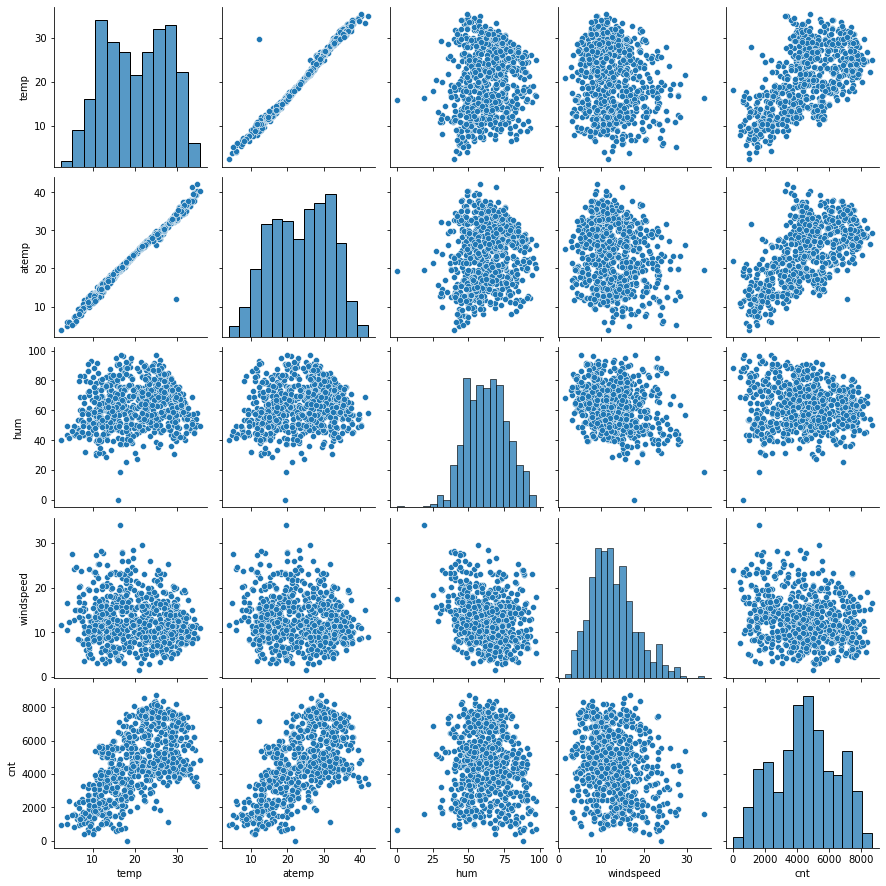

In [13]:
#plotting pair plot for analysis
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

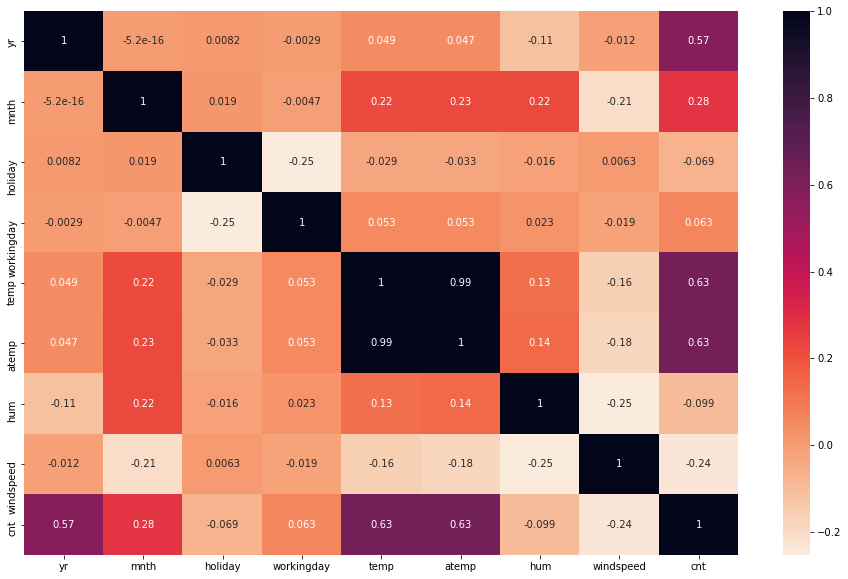

In [14]:
#checking the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="rocket_r")
plt.show()

In [15]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


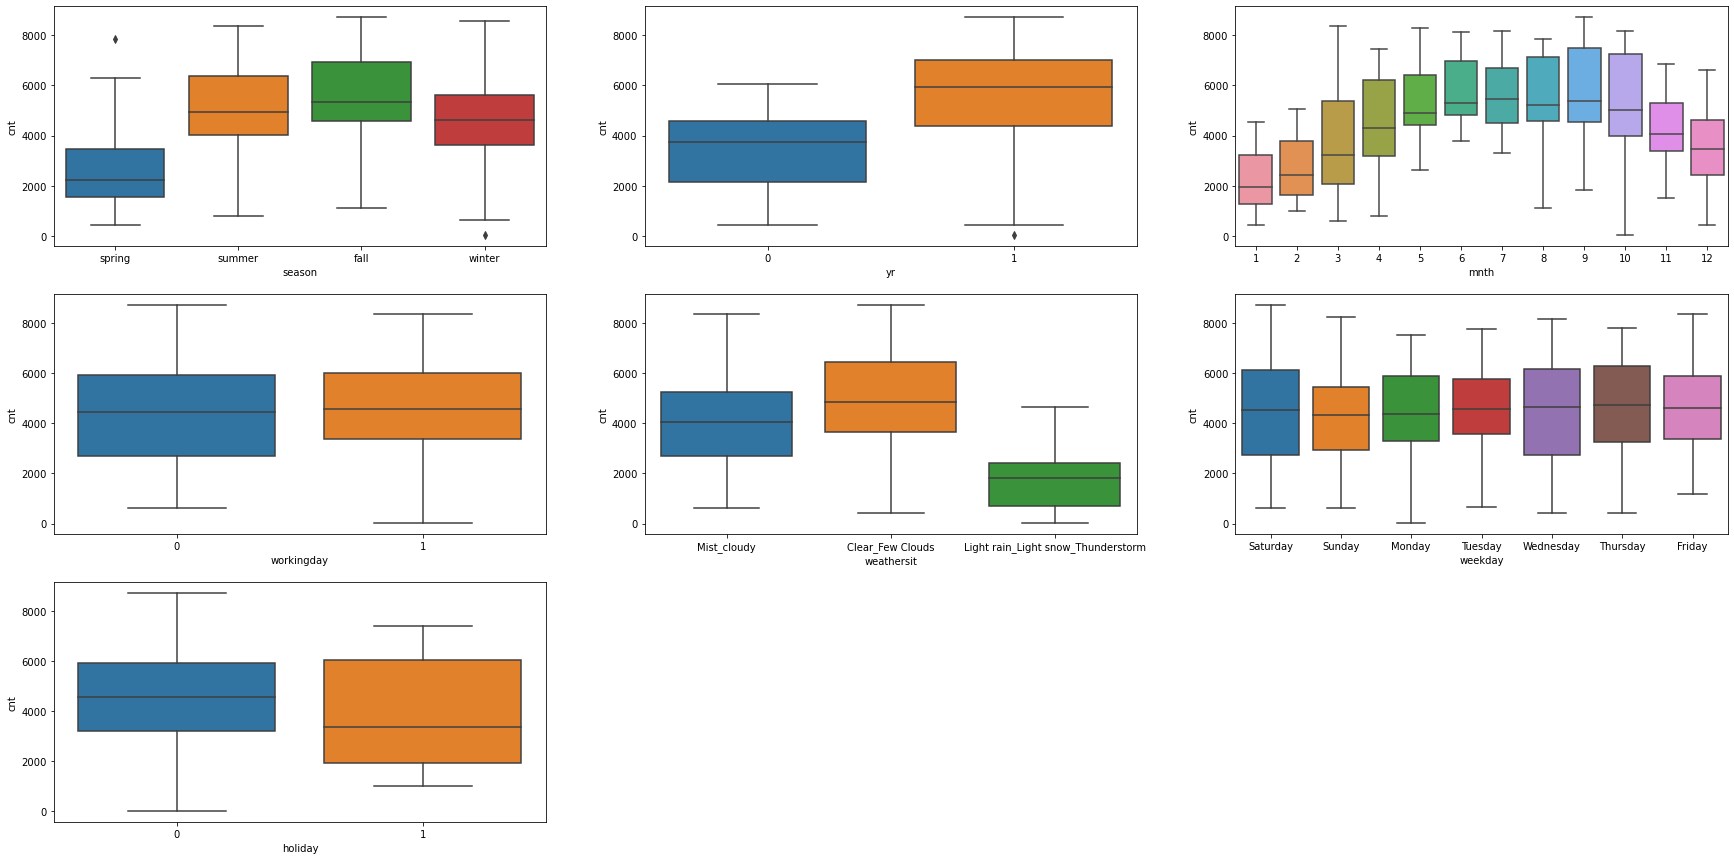

In [16]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

## 3.Data Preparation

In [17]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [18]:
#creating dummy variables to the categorical variables
Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [19]:
#adding variables as features to the dataset
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [20]:
#Deleting the orginal columns season,weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4.Splitting the Data into Training and Testing Sets

In [21]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

## Feature Scaling & Building the Model

In [25]:
#scaling the numerical data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#Creating X and Y
y_train = df_train.pop('cnt')
X_train = df_train

In [30]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
# Using RFE approach for feature selection 
# We start with 15 variables and will use mixed approach to build the model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14),
 (2, False, 6),
 (3, False, 4),
 (4, False, 3),
 (5, True, 1),
 (6, False, 2),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 5),
 (11, False, 11),
 (12, False, 12)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          8,
                                          9],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index([   'summer',    'Monday',  'Thursday',   'Tuesday', 'Wednesday',
                 2,           3,           4,           6,           7,
                10,          11,          12],
      dtype='object')

In [37]:
X_train_rfe = X_train[col]

In [38]:
#Building the model using Stats Model

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [39]:
lm_model = sm.OLS(y_train,X_train_rfe1)

In [40]:
lm=lm_model.fit()

In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.06e-186
Time:                        18:20:36   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.72
10,Saturday,9.93
11,Sunday,9.67
3,atemp,2.69
6,spring,2.65
1,holiday,2.53
4,hum,1.94
7,winter,1.92
9,Mist_cloudy,1.57
13,8,1.31


In [43]:
X_train_rfe1.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,Saturday,Sunday,5,8,9
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,1,1,0,0,0,0


In [44]:
#Dropping column workingday as VIF is very high
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [45]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [46]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.06e-186
Time:                        18:20:36   Log-Likelihood:                 503.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.78
2,atemp,13.92
4,windspeed,3.99
5,spring,2.71
6,winter,2.32
8,Mist_cloudy,2.26
0,yr,2.05
12,8,1.44
11,5,1.37
13,9,1.27


In [48]:
#Dropping column hum as VIF is very high
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [49]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.46e-183
Time:                        18:20:36   Log-Likelihood:                 495.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     496   BIC:                            -904.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [50]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.85
3,windspeed,3.94
0,yr,2.05
4,spring,1.73
7,Mist_cloudy,1.54
5,winter,1.52
11,8,1.44
10,5,1.29
12,9,1.25
8,Saturday,1.23


In [51]:
#Dropping column atemp as VIF is very high
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [52]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.97e-151
Time:                        18:20:36   Log-Likelihood:                 415.59
No. Observations:                 510   AIC:                            -805.2
Df Residuals:                     497   BIC:                            -750.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.87
0,yr,1.80
3,spring,1.67
6,Mist_cloudy,1.52
4,winter,1.51
7,Saturday,1.21
8,Sunday,1.19
9,5,1.19
10,8,1.19
11,9,1.12


In [54]:
#Dropping column windspeed as VIF is very high
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [55]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday',
                                          5,
                                          8,
                                          9],
      dtype='object')

In [56]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.22e-145
Time:                        18:20:36   Log-Likelihood:                 398.42
No. Observations:                 510   AIC:                            -772.8
Df Residuals:                     498   BIC:                            -722.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [57]:
#Dropping Saturday as the p-value is very high which means it is insignificant
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [58]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.59
5,Mist_cloudy,1.47
3,winter,1.36
2,spring,1.32
8,8,1.14
6,Sunday,1.13
7,5,1.13
9,9,1.10
4,Light rain_Light snow_Thunderstorm,1.05
1,holiday,1.04


In [59]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.74e-146
Time:                        18:20:36   Log-Likelihood:                 398.37
No. Observations:                 510   AIC:                            -774.7
Df Residuals:                     499   BIC:                            -728.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [60]:
#Dropping winter as the p-value is very high which means it is insignificant
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [61]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     170.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.28e-146
Time:                        18:20:36   Log-Likelihood:                 396.81
No. Observations:                 510   AIC:                            -773.6
Df Residuals:                     500   BIC:                            -731.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [62]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.46
4,Mist_cloudy,1.36
2,spring,1.24
7,8,1.11
5,Sunday,1.10
6,5,1.10
8,9,1.10
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.01


In [63]:
#Adding month 2 to check if the model improves
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,2
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0


In [64]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.00e-145
Time:                        18:20:36   Log-Likelihood:                 396.84
No. Observations:                 510   AIC:                            -771.7
Df Residuals:                     499   BIC:                            -725.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [65]:
#Month 2 has very high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [66]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     170.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.28e-146
Time:                        18:20:36   Log-Likelihood:                 396.81
No. Observations:                 510   AIC:                            -773.6
Df Residuals:                     500   BIC:                            -731.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.46
4,Mist_cloudy,1.36
2,spring,1.24
7,8,1.11
5,Sunday,1.10
6,5,1.10
8,9,1.10
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.01


In [68]:
#Adding month 7 to check if the model improves
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7
653,1,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0


In [69]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.19e-148
Time:                        18:20:36   Log-Likelihood:                 403.19
No. Observations:                 510   AIC:                            -784.4
Df Residuals:                     499   BIC:                            -737.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [70]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.53
4,Mist_cloudy,1.36
2,spring,1.25
7,8,1.12
5,Sunday,1.11
6,5,1.10
8,9,1.10
9,7,1.07
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [71]:
#Model has improved after adding month 7

In [72]:
#Adding month 10 to check if the model improves
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [73]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.50e-150
Time:                        18:20:36   Log-Likelihood:                 412.02
No. Observations:                 510   AIC:                            -800.0
Df Residuals:                     498   BIC:                            -749.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [74]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.58
4,Mist_cloudy,1.40
2,spring,1.28
10,10,1.16
5,Sunday,1.13
7,8,1.13
8,9,1.12
6,5,1.11
9,7,1.08
3,Light rain_Light snow_Thunderstorm,1.06


In [75]:
#Model has improved after adding month 10

In [76]:
#Adding month 11 to check if the model improves
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,11
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [77]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.98e-150
Time:                        18:20:36   Log-Likelihood:                 413.93
No. Observations:                 510   AIC:                            -801.9
Df Residuals:                     497   BIC:                            -746.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [78]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.64
4,Mist_cloudy,1.44
2,spring,1.32
10,10,1.17
5,Sunday,1.15
7,8,1.14
11,11,1.14
6,5,1.13
8,9,1.13
9,7,1.09


In [79]:
#P-value of month 11 is higher, so dropping month 11
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [80]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.50e-150
Time:                        18:20:36   Log-Likelihood:                 412.02
No. Observations:                 510   AIC:                            -800.0
Df Residuals:                     498   BIC:                            -749.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [81]:
#Adding month 12 to check if the model improves
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,12
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0


In [82]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     139.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.90e-150
Time:                        18:20:36   Log-Likelihood:                 414.39
No. Observations:                 510   AIC:                            -802.8
Df Residuals:                     497   BIC:                            -747.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [83]:
#P-value of month 12 is higher, so dropping month 12
X_train_rfe=X_train_rfe.drop([12],axis=1)

In [84]:
#Adding Monday to check if the model improves
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,Monday
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [85]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.54e-150
Time:                        18:20:36   Log-Likelihood:                 413.12
No. Observations:                 510   AIC:                            -800.2
Df Residuals:                     497   BIC:                            -745.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [86]:
#P-value of  Monday is higher but the model is not much improved, so dropping Monday
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [87]:
#Adding Tuesday to check if the model improves
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,Tuesday
653,1,0,0,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [88]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.39e-149
Time:                        18:20:36   Log-Likelihood:                 412.34
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     497   BIC:                            -743.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
#P-value of  Tuesday is higher but the model is not much improved, so dropping Tuesday
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [90]:
#Adding Wednesday to check if the model improves
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,Wednesday
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [91]:
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.22e-149
Time:                        18:20:36   Log-Likelihood:                 412.47
No. Observations:                 510   AIC:                            -798.9
Df Residuals:                     497   BIC:                            -743.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [92]:
#P-value of  Wednesday is higher but the model is not much improved, so dropping Wednesday
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [93]:
#Adding Thursday to check if the model improves
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,Thursday
653,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,0,0,0,0,0,0,0
728,1,0,1,0,0,1,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [94]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.86e-149
Time:                        18:20:36   Log-Likelihood:                 412.04
No. Observations:                 510   AIC:                            -798.1
Df Residuals:                     497   BIC:                            -743.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [95]:
#P-value of Thursday is higher but the model is not much improved, so dropping Thursday
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [96]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')

In [97]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.50e-150
Time:                        18:20:36   Log-Likelihood:                 412.02
No. Observations:                 510   AIC:                            -800.0
Df Residuals:                     498   BIC:                            -749.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
#Adding month 3 to check if the model improves
X_train_rfe[3]=X_train[3]

In [99]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          4.15e-151
Time:                        18:20:36   Log-Likelihood:                 415.96
No. Observations:                 510   AIC:                            -805.9
Df Residuals:                     497   BIC:                            -750.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [100]:
#Adding month 6 to check if the model improves
X_train_rfe[6]=X_train[6]

In [101]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.24e-162
Time:                        18:20:36   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [102]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.24e-162
Time:                        18:20:36   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [103]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.68
2,spring,1.45
4,Mist_cloudy,1.41
11,3,1.23
10,10,1.17
5,Sunday,1.14
7,8,1.14
8,9,1.13
6,5,1.12
9,7,1.09


### After Considering all the above models, the final model lm21 looks good

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
#Predict values
y_train_cnt = lm21.predict(X_train_rfe21)

In [106]:
#Calculating Residuals
res=y_train - y_train_cnt

## Making predictions using final model

Text(0.5, 0, 'Errors')

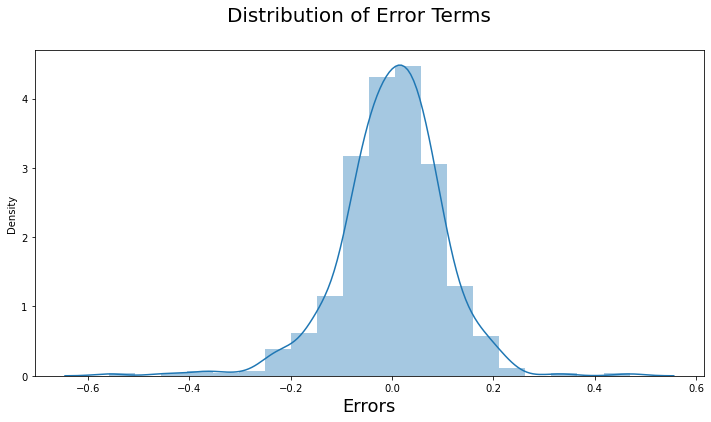

In [107]:
#Checking Assumptions of Normality
# Plot the histogram of distribution of error terms
fig = plt.figure(figsize = (12,6))
sns.distplot((res), bins = 20)
fig.suptitle('Distribution of Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

In [108]:
#Checking columns
X_train_rfe21.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9,
                                          7,
                                         10,
                                          3,
                                          6],
      dtype='object')

In [109]:
print(X_train_rfe21.shape)
print(res.shape)

(510, 14)
(510,)


In [110]:
#Scaling the test data
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [111]:
#Creating x and y sets
y_test = df_test.pop('cnt')
X_test = df_test

In [112]:
X_train_new=X_train_rfe21.drop(['const'], axis=1)

In [113]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [114]:
X_train_rfe21.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Sunday',
                                          5,
                                          8,
                                          9,
                                          7,
                                         10,
                                          3,
                                          6],
      dtype='object')

In [115]:
#Making predictions on the chosen model

y_pred = lm21.predict(X_test_new)

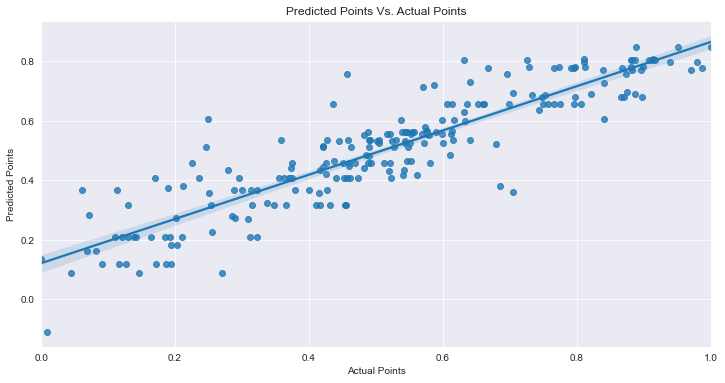

In [116]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

## Model Evaluation

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [118]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1057312003292042

In [119]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8029017439604776

In [120]:
X_t=X_train_new.iloc[:,0].values

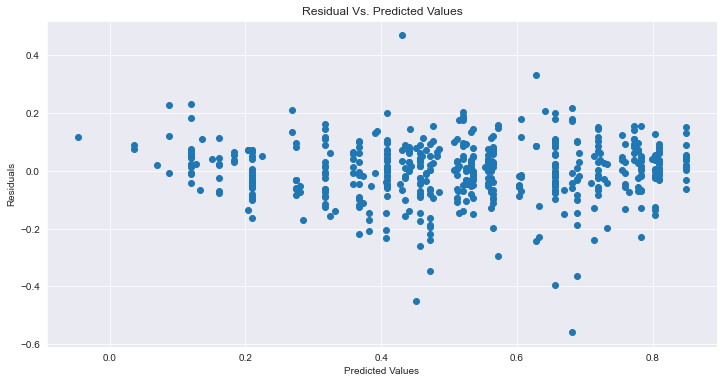

In [121]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_cnt,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

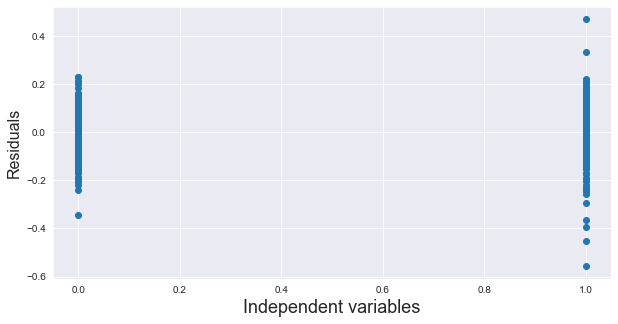

In [126]:
#Plotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure(figsize = (10,5))
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              
plt.xlabel('Independent variables', fontsize=18)                         
plt.ylabel('Residuals', fontsize=16)  
plt.show()

#### When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [123]:
X_train_new.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,Sunday,5,8,9,7,10,3,6
653,1,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,1,0,1,0,0,0,0,0,0,1,0
728,1,0,1,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [124]:
print(lm21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.24e-162
Time:                        18:20:37   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [125]:
Cofficients = round(lm21.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

const                                 0.41
yr                                    0.25
9                                     0.19
8                                     0.15
6                                     0.15
7                                     0.13
5                                     0.12
10                                    0.12
3                                     0.06
Sunday                               -0.05
holiday                              -0.08
Mist_cloudy                          -0.09
spring                               -0.20
Light rain_Light snow_Thunderstorm   -0.32
dtype: float64

##### cnt= 0.41+0.25 X yr - 0.08 X holiday - 0.2 X Spring - 0.32 X Light rain_Light snow_Thunderstorm - 0.090 X Mist_Cloudy +0.06 X 3 + 0.12 X 5 +0.15 X 6 +0.15 X 8 + 0.19 X 9 -0.05 X Sunday + 0.13 X 7 + 0.12 X 10

#### According to the model the demand for bikes depends mainly on below variables:
* > yr
* > holiday 
* > Spring 
* > Mist_Cloudy 
* > Light rain_Light 
* > snow_Thunderstorm
* > 3rd Month 
* > 5th Month 
* > 6th Month
* > 8th Month  
* > 9th Month
* > sunday 
* > 7th Month  
* > 10th Month

Demand for the bike increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and demand increases year to year.
Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, Sunday

## Final recommendations for the company:
#### Demand is higher in month of 3, 5 , 6, 8, 9 ,7, 10 and less demand during holidays, bad weather and weekends.